In [1]:
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib

In [2]:
def qft_error(n, k, noise_func):
    ''' 
    Estimates the infidelity of the QFT protocol, using MultiPhase gates with k<=n
    '''
    fidelity = 1
    for j in range(n):
        # n steps of MultiPhase
        mphase_length = k if n-j >= k else n-j
        approximation_error = np.cos(1/(2**k))**2 if n-j > k else 1
        fidelity *= (1-noise_func(mphase_length-1))**2*(approximation_error)     
    return fidelity

def noise(k):
    '''Using expression from Asymetric Blockade paper.
       k is the number of target qubits.
    '''
    return np.power(k, 1/3) * np.power(k+1, 2/3) * (0.02/(np.power(4, 1/3) * np.power(5, 2/3)) )


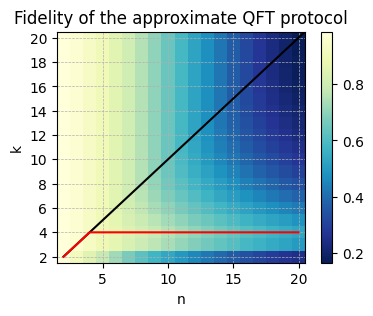

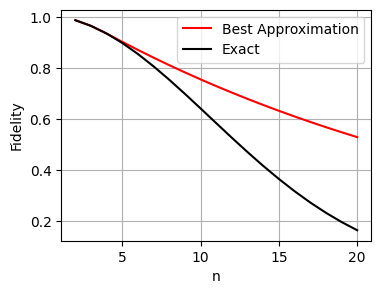

In [4]:
nmax = 21
n, k = np.meshgrid([*range(2,nmax)], [*range(2,nmax)])# y, x

vqft_error = np.vectorize(qft_error)

z = vqft_error(n,k, noise) 
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
# z = z[:-1, :-1]
z_min, z_max = np.min(z), np.max(z)

bestk = []
best_err = []
for ni, nn in  enumerate(n[0,:]):
    low_err = 0
    bestk.append((-1, -1, -1, -1))
    for ki, kk in enumerate(k[:,0]):
        # print(ni, ki)
        if z[ki, ni] > low_err:
            low_err = z[ki, ni]
            errn = z[ni,ni]
            bestk[-1] = (nn, kk, low_err, errn)



fig, ax = plt.subplots(figsize=(4,3))

c = ax.pcolormesh(n, k, z, cmap='YlGnBu_r')#, levels=[ 0.1*i for i in range(11)])#,  norm=matplotlib.colors.LogNorm())

plt.plot([2,nmax], [2,nmax], c='k')

nbest = np.array([ bk[0] for bk in bestk])
kbest = np.array([ bk[1] for bk in bestk])
errbest = np.array([ bk[2] for bk in bestk])
errline = np.array([ bk[3] for bk in bestk])

plt.plot(nbest, kbest, c='r')

ax.set_title('Fidelity of the approximate QFT protocol')
# set the limits of the plot to the limits of the data
ax.axis([n.min(), n.max(), k.min(), k.max()])
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.set_yticks([*range(2,nmax,2)])
ax.grid(linestyle='--', linewidth=0.5)
ax.set_xlim((1.5,nmax-0.5))
ax.set_ylim((1.5,nmax-0.5))
fig.colorbar(c, ax=ax)
plt.show()


fig, ax = plt.subplots(figsize=(4,3))
plt.plot(nbest, errbest, label='Best Approximation', c='r')
plt.plot(nbest, errline, label='Exact', c='k')
plt.xlabel('n')
plt.ylabel('Fidelity')
# plt.yscale('log')
plt.legend()
plt.grid(1)
plt.show()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [76]:
k[:-1,0]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [93]:
k[0,0]

2

In [95]:
bestk

[(5, 0.033431834287446005),
 (6, 0.05276319760169701),
 (5, 0.07351952926428384),
 (4, 0.0924337959970506),
 (4, 0.11013092562057358),
 (4, 0.1274829692376649),
 (4, 0.14449665586903948),
 (4, 0.16117858332255874),
 (4, 0.1775352207518207),
 (4, 0.19357291116486086),
 (4, 0.2092978738839324),
 (4, 0.2247162069573242),
 (4, 0.23983388952414697),
 (4, 0.25465678413300874),
 (4, 0.26919063901547713),
 (4, 0.2834410903152095)]